In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta       
import seaborn as sns
from sklearn.model_selection import train_test_split

# Get an idea of what the data we're working with looks like and Data prepocessing

In [5]:
df = pd.read_csv('ENB2012_data.csv')
df


# { X1 : Relative Compactness }
# { X2 : Surface Area }
# { X3 :Wall Area }
# { X4 : Roof Area }
# { X5 :Overall Height }
# { X6 :Orientation }
# { X7 :Glazing Area }
# { X8 :Glazing Area Distribution }

# { y1 : Heating Load }
# { y2 : Cooling Load }






,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 0


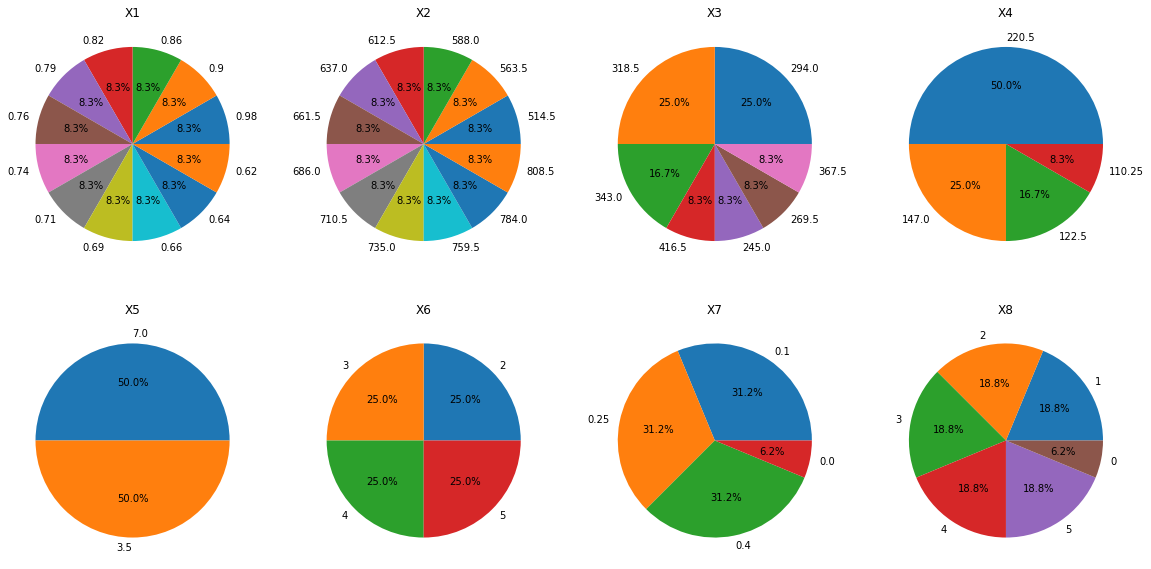

In [6]:
# Get the names of the 8 columns
columns = df.columns

# Create a subplot with 8 plots, one for each column
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

row = 0
col = 0
# Loop through the 8 columns
for i, column in enumerate(columns):
  # Calculate the class distribution for each column
  class_counts = df[column].value_counts()
  n_instances = 768
  class_percentages = (class_counts / n_instances)
  
  # Get the row and column index of the current plot
  if( col > 3):
    row += 1
    col = 0

  print(row,col)
  
  # Add the pie chart to the subplot
  try :
    ax[row, col].pie(class_percentages*100, labels=class_percentages.index, autopct='%1.1f%%')
    ax[row, col].set_title(column)
    col +=1
  except:
    continue
  
# Show the subplot
plt.show()

In [7]:
def check_clean_data(df):
    print(df.isnull().sum()) #check for null values
    print("\n(Rows, Columns)", df.shape) #check for missing values

    print("\nCheck for empty values")
    print(df[df.eq("?").any(1)]) #check for missing values
check_clean_data(df)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

(Rows, Columns) (768, 10)

Check for empty values
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, Y1, Y2]
Index: []


In [8]:
def standardize_data(df):
    feature_cols = [col for col in df.columns if col not in ['Y1', 'Y2']]
    for col in feature_cols:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df
df = standardize_data(df)
df


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-1.340767,-1.759300,-1.813393,15.55,21.33
1,2.040447,-1.784712,-0.561586,-1.469119,0.999349,-0.446922,-1.759300,-1.813393,15.55,21.33
2,2.040447,-1.784712,-0.561586,-1.469119,0.999349,0.446922,-1.759300,-1.813393,15.55,21.33
3,2.040447,-1.784712,-0.561586,-1.469119,0.999349,1.340767,-1.759300,-1.813393,15.55,21.33
4,1.284142,-1.228438,0.000000,-1.197897,0.999349,-1.340767,-1.759300,-1.813393,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,-1.173848,1.274794,0.561586,0.971879,-0.999349,1.340767,1.243239,1.410417,17.88,21.40
764,-1.362924,1.552931,1.123171,0.971879,-0.999349,-1.340767,1.243239,1.410417,16.54,16.88
765,-1.362924,1.552931,1.123171,0.971879,-0.999349,-0.446922,1.243239,1.410417,16.44,17.11
766,-1.362924,1.552931,1.123171,0.971879,-0.999349,0.446922,1.243239,1.410417,16.48,16.61


In [9]:
def df_stats(df):
    print(df.describe().round(6))
df_stats(df)

               X1          X2          X3          X4          X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.000000   -0.000000    0.000000    0.000000    0.000000    0.000000   
std      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
min     -1.362924   -1.784712   -1.684757   -1.469119   -0.999349   -1.340767   
25%     -0.772061   -0.741698   -0.561586   -0.791064   -0.999349   -0.670384   
50%     -0.133929    0.023178    0.000000    0.158213    0.000000    0.000000   
75%      0.622376    0.788055    0.561586    0.971879    0.999349    0.670384   
max      2.040447    1.552931    2.246342    0.971879    0.999349    1.340767   

               X7          X8          Y1          Y2  
count  768.000000  768.000000  768.000000  768.000000  
mean     0.000000   -0.000000   22.307201   24.587760  
std      1.000000    1.000000   10.090196    9.513306  
min     -1.759300   -1.813393    6.010000   10

In [10]:
# sns.pairplot(df)

Finding Correlation between features

In [11]:
corr_df = df.corr().round(6)
corr_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.991901,-0.203782,-0.868823,0.827747,-0.000000,-0.000000,-0.000000,0.622272,0.634339
X2,-0.991901,1.000000,0.195502,0.880720,-0.858148,0.000000,-0.000000,-0.000000,-0.658120,-0.672999
X3,-0.203782,0.195502,1.000000,-0.292316,0.280976,0.000000,0.000000,0.000000,0.455671,0.427117
X4,-0.868823,0.880720,-0.292316,1.000000,-0.972512,0.000000,0.000000,-0.000000,-0.861828,-0.862547
X5,0.827747,-0.858148,0.280976,-0.972512,1.000000,-0.000000,-0.000000,-0.000000,0.889431,0.895785
X6,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.000000,0.000000,0.000000,-0.002587,0.014290
X7,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.212964,0.269841,0.207505
X8,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.212964,1.000000,0.087368,0.050525
Y1,0.622272,-0.658120,0.455671,-0.861828,0.889431,-0.002587,0.269841,0.087368,1.000000,0.975862
Y2,0.634339,-0.672999,0.427117,-0.862547,0.895785,0.014290,0.207505,0.050525,0.975862,1.000000


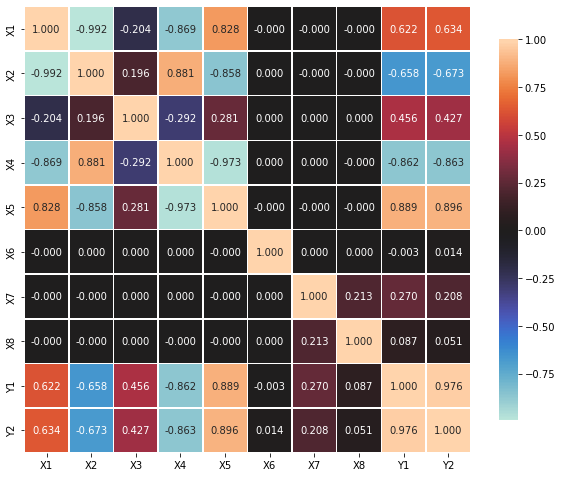

In [12]:
#code taken from https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4#:~:text=Positive%20Correlation%3A%20means%20that%20if,they%20have%20a%20linear%20relationship.

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.3f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

correlation_heatmap(df)

# Starting Simper Linear Regression

In [13]:
features = df.copy()
features = features.drop(columns=["Y1", "Y2"])


In [14]:
labels = df.copy()
labels = labels.drop(columns=["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"])

Convert to numpy

In [15]:

features = features.to_numpy()
labels = labels.to_numpy()


In [16]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(N),x])    #add bias by adding a constant feature of value 1
        # self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        self.w = np.linalg.inv(x.T @ x)@x.T@y  
        return self, self.w
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(N),x])
        yh = x@self.w                             #predict the y values
        return yh


Experiments:
We first start by defining a function to split the data into training and test sets

In [17]:
def mean_squared_error(a, b):
    # Calculate the difference between the matrices
    difference = (a - b)**2
    mse = np.mean(difference)
    # Return the mean squared error
    return mse

def mean_absolute_error(a, b):
    # Calculate the absolute difference between the matrices
    difference = np.mean(np.abs(a - b))
    return difference

def r_squared(a, b):
    # Calculate the mean of the first matrix
    mean = np.mean(a)
    # Calculate the difference between the matrices and the mean of the first matrix
    difference = a - b
    mean_difference = a - mean
    # Calculate the sum of squared differences
    squared_difference = difference**2
    mean_squared_difference = mean_difference**2
    # Calculate the R-squared
    r_squared = 1 - (np.sum(squared_difference) / np.sum(mean_squared_difference))
    # Return the R-squared
    return r_squared


# print("MSE", mean_squared_error(y_test, yh))
# print("MAE", mean_absolute_error(y_test, yh))
# print("R^2", r_squared(y_test, yh))

1- Report the performance of linear regression and fully batched logistic regression. For both datasets use a 80/20
train/test split and report the performance on both training set and test set.

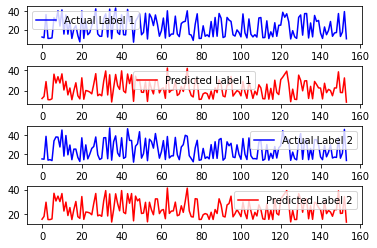

MSE for linear regression, testing set:
 23.631249371083786
MSE for linear regression, training set:
 21.97833550210561
MAE for linear regression, testing set:
 3.9606691244418113
MAE for linear regression, training set:
 3.8641701842627185
R^2 for linear regression, testing set:
 0.7697003158395628
R^2 for linear regression, training set:
 0.7710585867623028
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 2.22043861e+01  2.4495

In [18]:
feat_train, feat_test, label_train, label_test = train_test_split(features,labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot


plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training
data affects the performance for both models. Plot two curves as a function of training size, one for performance
in train and one for test.

Linear Regression:

12.054061292020434 9.883772943338434 15.00241201377559 7.795183734255779 10.702039633039494 12.04038564048045 50.2230965833264 

11.807304939677909 10.063475883089852 13.855308553530524 10.76459169656023 10.649112499726911 10.03908977213162 45.216033836596154


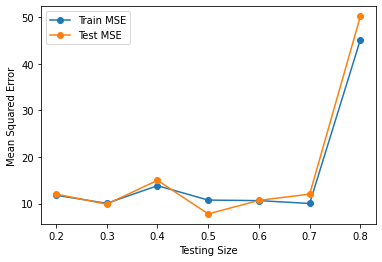

In [19]:
def linearRegressionDiffSize(ratio):
    feat_train, feat_test, label_train, label_test = train_test_split(features,labels,test_size=0.2)
    experiment1_lr = LinearRegression()
    feat_train  = np.array(feat_train)
    feat_test  = np.array(feat_test)
    label_train  = np.array(label_train)
    label_test  = np.array(label_test)
    exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
    exp1_testing = exp1_training.predict(feat_test)
    exp1_train_expected = exp1_training.predict(feat_train)
    return experiment1_lr, mean_squared_error(label_test, exp1_testing), mean_squared_error(label_train, exp1_train_expected)

subset_20, mse_subset_20, mse_train_subset_20 = linearRegressionDiffSize(0.2)
subset_30, mse_subset_30, mse_train_subset_30 = linearRegressionDiffSize(0.3)
subset_40, mse_subset_40, mse_train_subset_40 = linearRegressionDiffSize(0.4)
subset_50, mse_subset_50, mse_train_subset_50 = linearRegressionDiffSize(0.5)
subset_60, mse_subset_60, mse_train_subset_60 = linearRegressionDiffSize(0.6)
subset_70, mse_subset_70, mse_train_subset_70 = linearRegressionDiffSize(0.7)
subset_80, mse_subset_80, mse_train_subset_80 = linearRegressionDiffSize(0.8)
print(mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80,"\n")
print(mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80)
# Define the training size and MSE values
test_sizes = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
test_mse = [mse_subset_20,mse_subset_30,mse_subset_40,mse_subset_50,mse_subset_60,mse_subset_70,mse_subset_80]
train_mse = [mse_train_subset_20,mse_train_subset_30,mse_train_subset_40,mse_train_subset_50,mse_train_subset_60,mse_train_subset_70,mse_train_subset_80]
plt.plot(test_sizes, train_mse, 'o-', label='Train MSE')
plt.plot(test_sizes, test_mse, 'o-', label='Test MSE')
plt.xlabel('Testing Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# What would happen if we got rid of features that have almost no correlation?

In [24]:
new_df = df.copy().drop(columns=["X6", "X8"])
corr_features = new_df.copy()
corr_features = corr_features.drop(columns=["Y1", "Y2"])
corr_features = corr_features.to_numpy()


corr_labels = new_df.copy()
corr_labels = corr_labels.drop(columns=["X1", "X2", "X3", "X4", "X5", "X7"])
corr_labels = corr_labels.to_numpy()

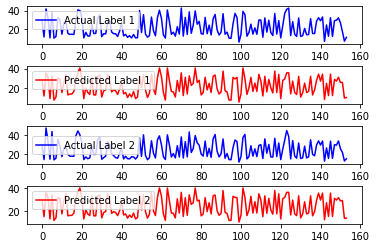

MSE for linear regression, testing set:
 9.160193403857066
MSE for linear regression, training set:
 9.841807445501685
MAE for linear regression, testing set:
 2.224805071601504
MAE for linear regression, training set:
 2.2904584609816063
R^2 for linear regression, testing set:
 0.9052760475447058
R^2 for linear regression, training set:
 0.8990132453067928
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 22.28884371  24.55974841

In [25]:
feat_train, feat_test, label_train, label_test = train_test_split(corr_features,corr_labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot

plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


# Expirement 2: Can we do better with Non Linear Basis'

In [20]:
gaussian = lambda x,mu,sigma: np.exp(-((x-mu)/sigma)**2)          #non-linear feature function

guassian_features = features.copy()

D = 10
mu = np.linspace(0, 10, D) # some values for mu
D = mu.shape[0] # number of elements in mu

phi = np.zeros((guassian_features.shape[0], mu.shape[0]))
for i in range(guassian_features.shape[0]):
    for j in range(mu.shape[0]):
        for k in range(guassian_features.shape[1]):
            phi[i, j] += gaussian(guassian_features[i, k], mu[j], 1)

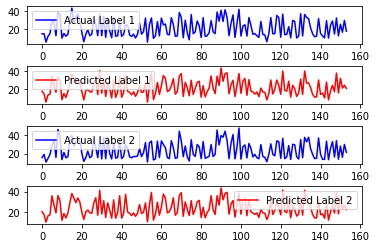

MSE for linear regression, testing set:
 17.77887977723845
MSE for linear regression, training set:
 18.25631415760393
MAE for linear regression, testing set:
 3.4335049664427544
MAE for linear regression, training set:
 3.478856594443659
R^2 for linear regression, testing set:
 0.8058909872989355
R^2 for linear regression, training set:
 0.8148173989380207
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 22.3241348   24.57373825

In [21]:

feat_train, feat_test, label_train, label_test = train_test_split(guassian_features,labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot

plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()


In [22]:
sigmoid = lambda x,mu, s: 1/(1 + np.exp(-(x - mu)/s))

sigmoid_features = features.copy()

D = 15
mu = np.linspace(0, 10, D) # some values for mu
D = mu.shape[0] # number of elements in mu

phi = np.zeros((sigmoid_features.shape[0], mu.shape[0]))
for i in range(sigmoid_features.shape[0]):
    for j in range(mu.shape[0]):
        for k in range(sigmoid_features.shape[1]):
            phi[i, j] += sigmoid(sigmoid_features[i, k], mu[j], 1)

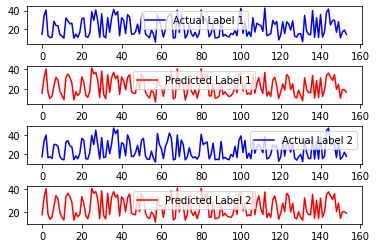

MSE for linear regression, testing set:
 11.85842507629214
MSE for linear regression, training set:
 12.462127400688045
MAE for linear regression, testing set:
 2.7109981666423852
MAE for linear regression, training set:
 2.808081834483553
R^2 for linear regression, testing set:
 0.8772576608211766
R^2 for linear regression, training set:
 0.872145389620403
Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.

Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.

W values 
 [[ 2.23651344e+01  2.458323

In [23]:
feat_train, feat_test, label_train, label_test = train_test_split(sigmoid_features,labels,test_size=0.2)
experiment1_lr = LinearRegression()
feat_train  = np.array(feat_train)
feat_test  = np.array(feat_test)
label_train  = np.array(label_train)
label_test  = np.array(label_test)
exp1_training, weights = experiment1_lr.fit(feat_train, label_train) #Train model
exp1_testing = exp1_training.predict(feat_test)
exp1_train_expected = exp1_training.predict(feat_train)


#Second plot

plt.subplot(4, 1, 1)
plt.plot(label_test[:, 0], color='blue', label='Actual Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(label_test[:, 1], color='blue', label='Actual Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(exp1_testing[:, 0], color='red', label='Predicted Label 1')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(exp1_testing[:, 1], color='red', label='Predicted Label 2')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.legend()
plt.show()
#TODO: four plots, two for each dependent variable
print("MSE for linear regression, testing set:\n", mean_squared_error(label_test, exp1_testing))
print("MSE for linear regression, training set:\n", mean_squared_error(label_train, exp1_train_expected))


print("MAE for linear regression, testing set:\n", mean_absolute_error(label_test, exp1_testing))
print("MAE for linear regression, training set:\n", mean_absolute_error(label_train, exp1_train_expected))


print("R^2 for linear regression, testing set:\n", r_squared(label_test, exp1_testing))
print("R^2 for linear regression, training set:\n", r_squared(label_train, exp1_train_expected))


print("Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.\n")
# print("Weights:\n",weights)
print("Each feature affects the performance of the model in different ways, depending on the magnitude and sign of its weight, as well as the relationship between the feature and the target variable. For example, a feature with a large positive weight will have a strong positive impact on the model's prediction, while a feature with a large negative weight will have a strong negative impact. Features with small weights will have less impact on the model's prediction.\n")
print("W values \n", weights)
print("Importance list for dependent variable Y1:\n")

importance = sorted(zip(range(8), weights[:, 0]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
print("Importance list for dependent variable Y2:\n")
importance = sorted(zip(range(8), weights[:, 1]), key=lambda x: abs(x[1]), reverse=True)

for feature, weight in importance:
    print(f"Feature X{feature + 1}: {weight}")
print()
